 -온라인, 오프라인 카드 사용 내역 데이터를 확인

    1.csv폴더 안에 있는 오프라인.csv, 온라인.csv파일 로드
    2. 두개의 데이터프레임을 단순한 행 결합(유니언 결합)
        -두개의 데이터프레임의 구조 파악
        -두개의 데이터프레임의 구조를 같은 형태로 변환
        -유니언 결합 
        
    3. 기준년월 컬럼의 데이터를 시계열 데이터로 변경 
    4. 기준년월, 업종별 총이용금액의 합계를 그래프 
    

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
offline=pd.read_csv("../../csv/card/오프라인.csv",encoding='cp949')

In [4]:
online=pd.read_csv('../../csv/card/온라인.csv')

In [5]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [6]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   crym          651 non-null    int64
 1   ma_fem_dc     651 non-null    int64
 2   agegrp_dc     651 non-null    int64
 3   tco_btc_u_ct  651 non-null    int64
 4   tco_btc_u_am  651 non-null    int64
dtypes: int64(5)
memory usage: 25.6 KB


In [7]:
#offline의 컬럼의 이름을 변경
offline.columns= ['기준년월','업종','성별','연령대','총이용건수', '총이용금액']

In [8]:
offline.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.0


In [9]:
#offline의 컬럼의 이름을 변경
online.columns=['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [10]:
online.head(1)

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685


In [13]:
# online 데이터프레임에 업종 컬럼을 추가 -> 데이터 '온라인'
online['업종']= '온라인'

In [14]:
online['업종'].value_counts()

업종
온라인    651
Name: count, dtype: int64

In [15]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준년월    651 non-null    int64 
 1   성별      651 non-null    int64 
 2   연령대     651 non-null    int64 
 3   총이용건수   651 non-null    int64 
 4   총이용금액   651 non-null    int64 
 5   업종      651 non-null    object
dtypes: int64(5), object(1)
memory usage: 30.6+ KB


In [16]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준년월    651 non-null    int64 
 1   성별      651 non-null    int64 
 2   연령대     651 non-null    int64 
 3   총이용건수   651 non-null    int64 
 4   총이용금액   651 non-null    int64 
 5   업종      651 non-null    object
dtypes: int64(5), object(1)
memory usage: 30.6+ KB


In [18]:
df= pd.concat([offline, online], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 0 to 650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    3299 non-null   int64  
 1   업종      3299 non-null   object 
 2   성별      3299 non-null   int64  
 3   연령대     3299 non-null   int64  
 4   총이용건수   3299 non-null   int64  
 5   총이용금액   3299 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 180.4+ KB


In [20]:
## pandas에서 지수표현식을 없애기
pd.options.display.float_format= '{:2f}'.format

In [21]:
#기준년월 데이터를 시계열 변경
df['기준년월']=pd.to_datetime(
    df['기준년월'],
    format='%Y%m'
)

In [23]:
# 성별 컬럼의 데이터를 1은 남자 2는 여자 변경
df2=df.copy()

In [29]:
##replace()
df2['성별'].replace(
    {1:'남자',
     2:'여자',
     9:'무관'}
)

0      남자
1      남자
2      남자
3      남자
4      남자
       ..
646    여자
647    여자
648    여자
649    여자
650    여자
Name: 성별, Length: 3299, dtype: object

In [31]:
##map()+(일반함수|lambda함수)
def change(x):
    # x에 입력되는 데이터들을 1, 2, 9, - 
    #x가 만약에 1이라면 -> '남자'되돌려준다 
    if x==1:
        return '남자'
    elif x==2:
        return '여자'
    
    df2['성별'].map(change)

In [33]:
#if 구문을 한줄로 표시: 
#"조건식이 참인경우 되돌려줄 데이터" if(조건식) else "거짓인경우 데이터"
df['성별']=df2['성별'].map(
    lambda x: "여자" if(x==2) else ("남자" if(x==1) else "무관")
)

0      남자
1      남자
2      남자
3      남자
4      남자
       ..
646    여자
647    여자
648    여자
649    여자
650    여자
Name: 성별, Length: 3299, dtype: object

In [34]:
df2.reset_index(drop=True, inplace=True)



In [44]:
#for문
for i in range(len(df2)):
    print(df2['성별'][i])
    data= df2['성별'][i]
    # 조건문을 사용
    if data==1:
        df2.loc[i, '성별']='남자'
    elif data ==2:
        df2.loc[i, '성별']= '여자'
    else:
        df2.loc[i, '성별']='무관'

1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1


C:\Users\qhwjd\AppData\Local\Temp\ipykernel_20444\2752406992.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '남자' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[i, '성별']='남자'


1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
2
2
2


In [45]:
## 기준년월, 업종별 총이용금액의 합계 그래프 표시
group_data=df[
    ['기준년월','업종','총이용금액']
].groupby(['기준년월','업종']).sum()
group_data

총이용금액
기준년월       업종                       
2019-01-01 백화점   455895539087.000000
           슈퍼마켓  173613089088.000000
           온라인   778281658966.000000
           편의점    44083584621.000000
           할인점   198171780041.000000
...                              ...
2021-09-01 백화점   422081236462.000000
           슈퍼마켓  181809468875.000000
           온라인  1195275255905.000000
           편의점    61362822910.000000
           할인점   151079584433.000000

[165 rows x 1 columns]

In [46]:
import platform

In [47]:
if platform.system()=='Darwin':
    plt.rc('font',family='AppleGothic')
else:
    plt.rc('font',family='Malgun Gothic')

<Axes: xlabel='기준년월,업종'>

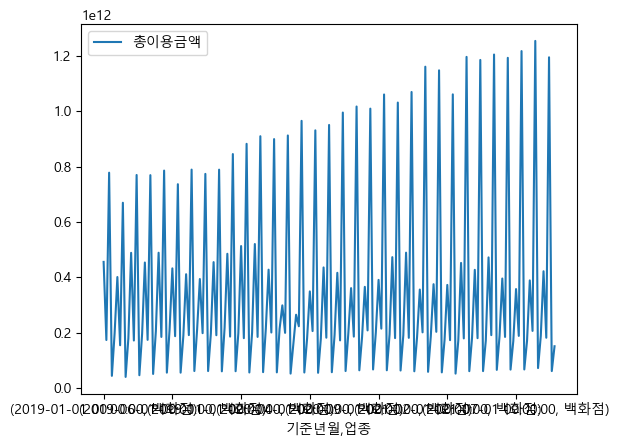

In [49]:
group_data.plot()

In [51]:
group_data2=df.groupby(['기준년월','업종']).sum()['총이용금액']

<Axes: xlabel='기준년월'>

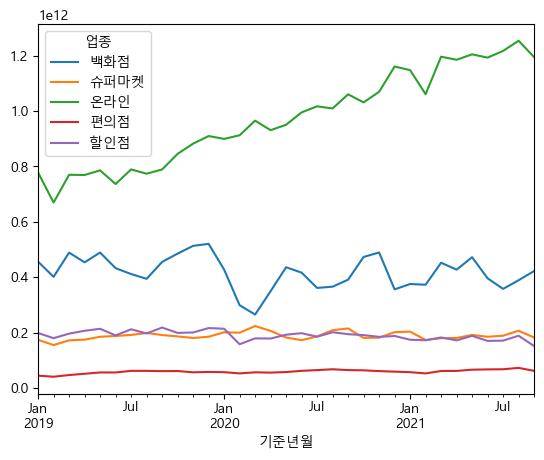

In [54]:
group_data2.unstack().plot()

In [55]:
## 기준년월 별 합산, 데이터를 확인 
group_data3=group_data2.unstack()

In [60]:
group_data3['All']=group_data3.sum(axis=1)

<Axes: xlabel='기준년월'>

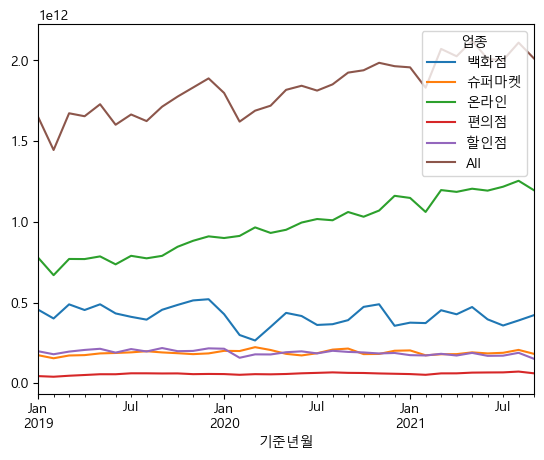

In [61]:
group_data3.plot()

In [64]:
pivot_data=df.pivot_table(
    index= '기준년월',
    columns= '업종',
    values= '총이용금액',
    aggfunc='sum',
    margins=True
)
pivot_data

업종,백화점,슈퍼마켓,온라인,편의점,할인점,All
기준년월,,,,,,
2019-01-01 00:00:00,455895539087.000000,173613089088.000000,778281658966.000000,44083584621.000000,198171780041.000000,1650045651803.000000
2019-02-01 00:00:00,401191621441.000000,154639049561.000000,669627559900.000000,40196820908.000000,179570386603.000000,1445225438413.000000
2019-03-01 00:00:00,488652119604.000000,171793017241.000000,769982635445.000000,46346861161.000000,195968338413.000000,1672742971864.000000
2019-04-01 00:00:00,453672286027.000000,174178319781.000000,769343707461.000000,50935845149.000000,206253864397.000000,1654384022815.000000
2019-05-01 00:00:00,489003572924.000000,184689508776.000000,785876486705.000000,55691270613.000000,213410907627.000000,1728671746645.000000
2019-06-01 00:00:00,432509893802.000000,187423849425.000000,736634786418.000000,55593119763.000000,189591408279.000000,1601753057687.000000
2019-07-01 00:00:00,411344032847.000000,191281681184.000000,789419422650.000000,61483146955.000000,211653341788.000000,1665181625424.000000
2019-08-01 00:00:00,393982708640.000000,198311508288.000000,773942892864.000000,61406245686.000000,196699817054.000000,1624343172532.000000
2019-09-01 00:00:00,455074741069.000000,190870551327.000000,789228722869.000000,60421294611.000000,217988445163.000000,1713583755039.000000


<Axes: xlabel='기준년월'>

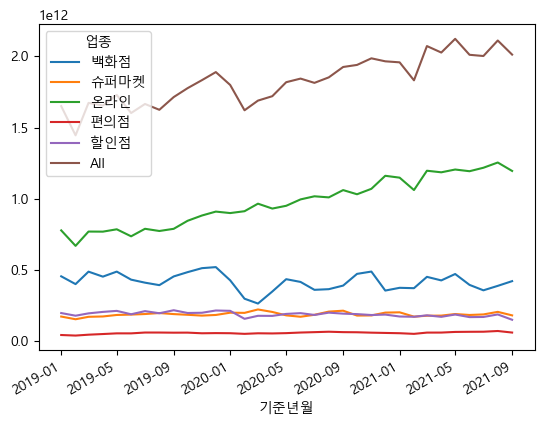

In [71]:
pivot_data.iloc[:-1].plot()

<Axes: xlabel='기준년월'>

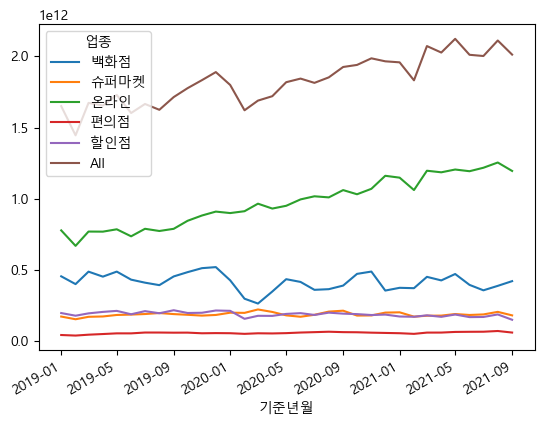

In [70]:
pivot_data.drop('All',axis=0).plot()

In [72]:
pivot_data['오프라인']=pivot_data['All']-pivot_data['온라인']

In [73]:
data=pivot_data.iloc[:-1]

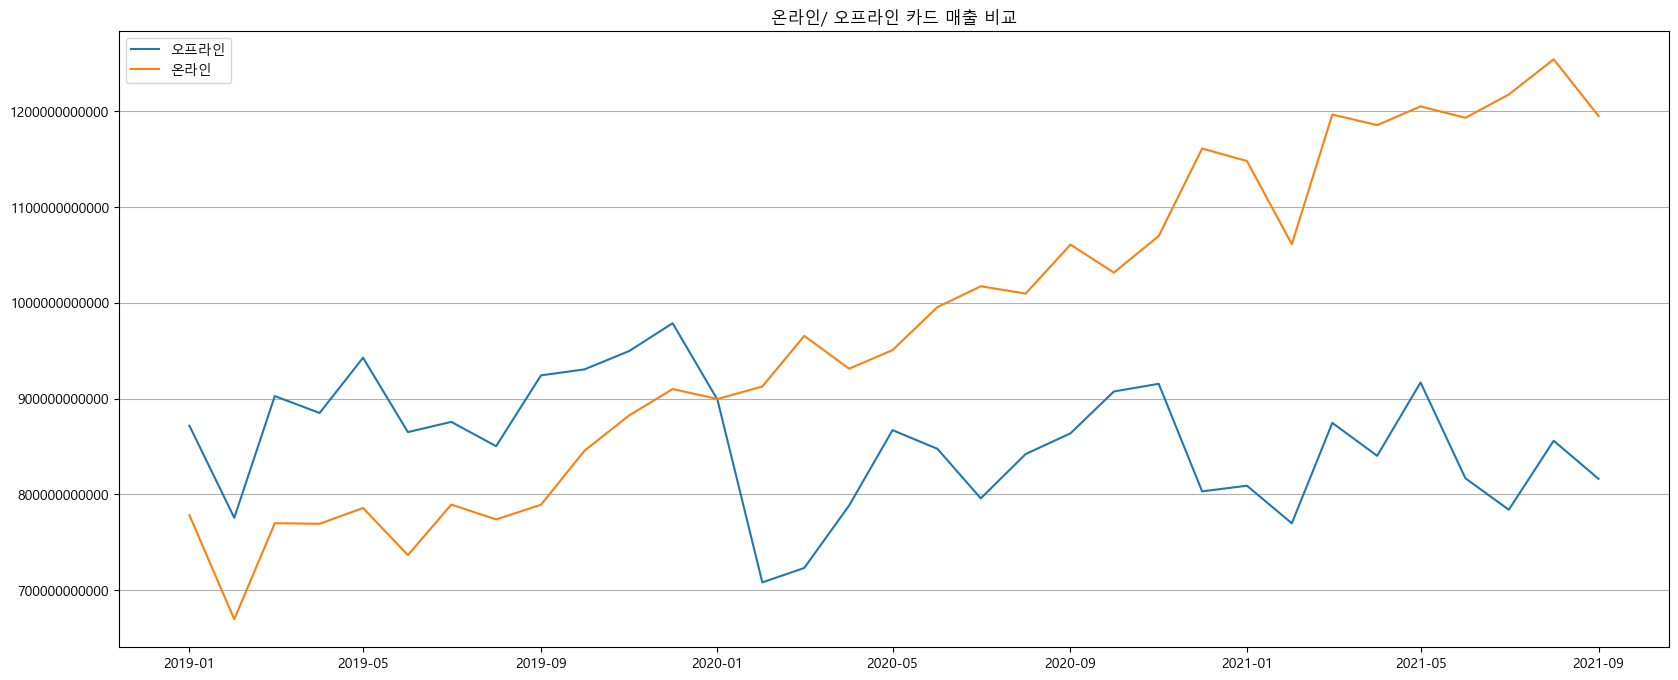

In [77]:
x=data.index
y1= data['오프라인']
y2= data['온라인']

# 그래프의 사이즈를 변경
plt.figure(figsize=(20, 8))

#그래프에서 지수표현식 제거
plt.ticklabel_format(axis='y', style='plain')

#y축에 그리드 선을 추가
plt.grid(True, axis='y')

plt.plot(x, y1, label='오프라인')
plt.plot(x, y2, label='온라인')
#그래프의 제목 추가
plt.title("온라인/ 오프라인 카드 매출 비교")
#그래프에 범례 추가
plt.legend()
plt.show()